exploration of data (raymond)

In [1]:
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the data directory
data_dir = Path('/home/flamingo/Documents/teleop/ramdom')

## 1. Overview of Episodes

In [2]:
# List all episode directories
episodes = sorted([d for d in data_dir.iterdir() if d.is_dir() and d.name.startswith('episode_')])
print(f"Total number of episodes: {len(episodes)}")
print(f"\nFirst 10 episodes:")
for ep in episodes[:10]:
    pcd_files = list(ep.glob('*.npy'))
    episode_files = [f for f in pcd_files if 'episode' in f.name]
    camera_files = [f for f in pcd_files if 'episode' not in f.name]
    print(f"  {ep.name}: {len(camera_files)} point cloud files, {len(episode_files)} episode file(s)")

Total number of episodes: 81

First 10 episodes:
  episode_0: 121 point cloud files, 1 episode file(s)
  episode_1: 100 point cloud files, 1 episode file(s)
  episode_10: 101 point cloud files, 1 episode file(s)
  episode_11: 102 point cloud files, 1 episode file(s)
  episode_12: 92 point cloud files, 1 episode file(s)
  episode_13: 98 point cloud files, 1 episode file(s)
  episode_15: 86 point cloud files, 1 episode file(s)
  episode_16: 114 point cloud files, 1 episode file(s)
  episode_17: 82 point cloud files, 1 episode file(s)
  episode_18: 98 point cloud files, 1 episode file(s)


## 2. Load Episode Metadata

Each episode contains an `episode_N.npy` file with robot state and action information.

In [3]:
# Load episode metadata
sample_episode = episodes[0]
episode_file = list(sample_episode.glob('episode_*.npy'))[0]

print(f"Loading: {episode_file}")
episode_data = np.load(episode_file, allow_pickle=True).item()

print(f"\nEpisode data keys: {episode_data.keys()}")
print(f"\nActions shape: {np.array(episode_data['actions']).shape}")
print(f"Number of timesteps: {len(episode_data['obs'])}")

# Check what's in the observation
if len(episode_data['obs']) > 0:
    print(f"\nObservation keys: {episode_data['obs'][0].keys()}")
    for key in episode_data['obs'][0].keys():
        value = episode_data['obs'][0][key]
        print(f"  {key}: shape {np.array(value).shape}")

Loading: /home/flamingo/Documents/teleop/ramdom/episode_0/episode_0.npy

Episode data keys: dict_keys(['obs', 'actions', 'rewards', 'dones'])

Actions shape: (121, 22)
Number of timesteps: 121

Observation keys: dict_keys(['cartesian_position', 'gripper_position', 'joint_positions', 'joint_velocities', 'joint_torques_computed', 'prev_joint_torques_computed', 'prev_joint_torques_computed_safened', 'motor_torques_measured', 'prev_controller_latency_ms', 'prev_command_successful', 'robot_timestamp_seconds', 'robot_timestamp_nanos', 'robot_action', 'desired_pose', ' desired_pose', 'intrinsics', 'palm_pose'])
  cartesian_position: shape (7,)
  gripper_position: shape (16,)
  joint_positions: shape (7,)
  joint_velocities: shape (7,)
  joint_torques_computed: shape (7,)
  prev_joint_torques_computed: shape (7,)
  prev_joint_torques_computed_safened: shape (7,)
  motor_torques_measured: shape (7,)
  prev_controller_latency_ms: shape ()
  prev_command_successful: shape ()
  robot_timestamp_sec

## 3. Examine Point Cloud Data

The camera files (e.g., `CL8384200N1_000000.npy`) contain 3D point clouds.

In [4]:
# Load a point cloud file
pcd_files = sorted([f for f in sample_episode.glob('*.npy') if 'episode' not in f.name])
sample_pcd_file = pcd_files[0]

print(f"Loading: {sample_pcd_file.name}")
pcd_data = np.load(sample_pcd_file)

print(f"\nPoint cloud shape: {pcd_data.shape}")
print(f"Data type: {pcd_data.dtype}")
print(f"\nX range: [{pcd_data[:, 0].min():.3f}, {pcd_data[:, 0].max():.3f}]")
print(f"Y range: [{pcd_data[:, 1].min():.3f}, {pcd_data[:, 1].max():.3f}]")
print(f"Z range: [{pcd_data[:, 2].min():.3f}, {pcd_data[:, 2].max():.3f}]")
print(f"\nNumber of points: {len(pcd_data)}")

Loading: CL8384200N1_000000.npy

Point cloud shape: (149018, 3)
Data type: float32

X range: [-0.063, 0.698]
Y range: [-0.211, 0.136]
Z range: [0.020, 0.666]

Number of points: 149018


## 4. Visualize Point Cloud (2D Projections)

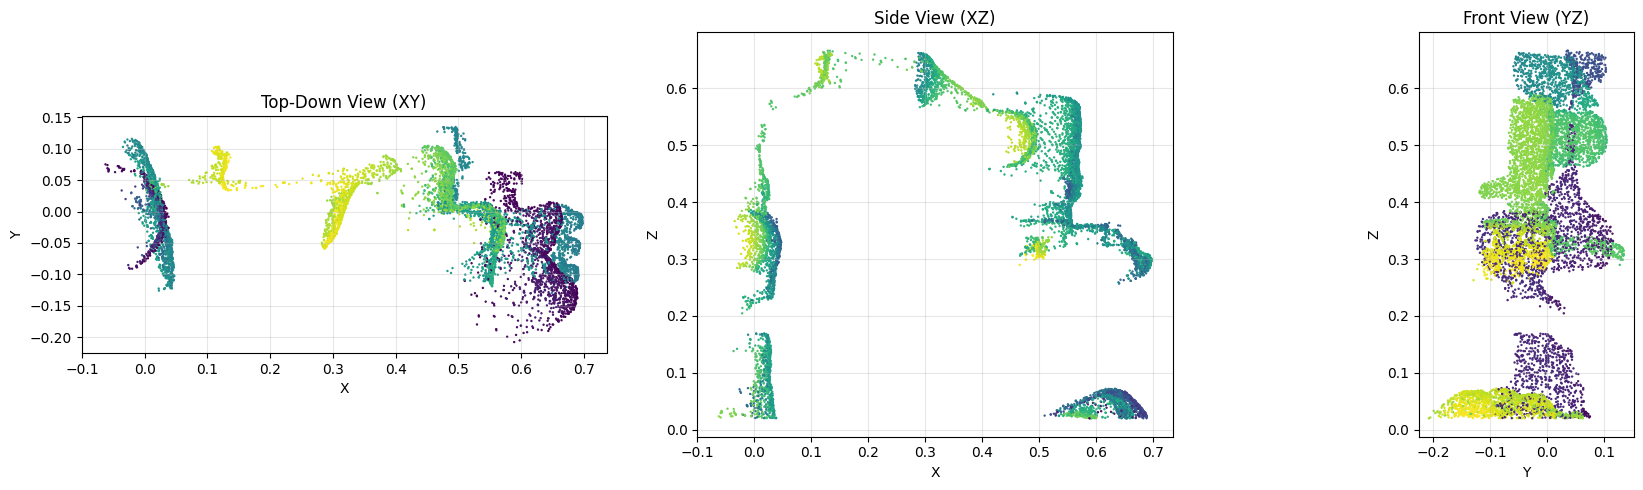

In [5]:
# Downsample for visualization
subsample_idx = np.random.choice(len(pcd_data), min(10000, len(pcd_data)), replace=False)
pcd_subsample = pcd_data[subsample_idx]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# XY view (top-down)
axes[0].scatter(pcd_subsample[:, 0], pcd_subsample[:, 1], s=0.5, c=pcd_subsample[:, 2], cmap='viridis')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title('Top-Down View (XY)')
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)

# XZ view (side)
axes[1].scatter(pcd_subsample[:, 0], pcd_subsample[:, 2], s=0.5, c=pcd_subsample[:, 1], cmap='viridis')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Z')
axes[1].set_title('Side View (XZ)')
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)

# YZ view (front)
axes[2].scatter(pcd_subsample[:, 1], pcd_subsample[:, 2], s=0.5, c=pcd_subsample[:, 0], cmap='viridis')
axes[2].set_xlabel('Y')
axes[2].set_ylabel('Z')
axes[2].set_title('Front View (YZ)')
axes[2].set_aspect('equal')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Visualize Point Cloud (3D)

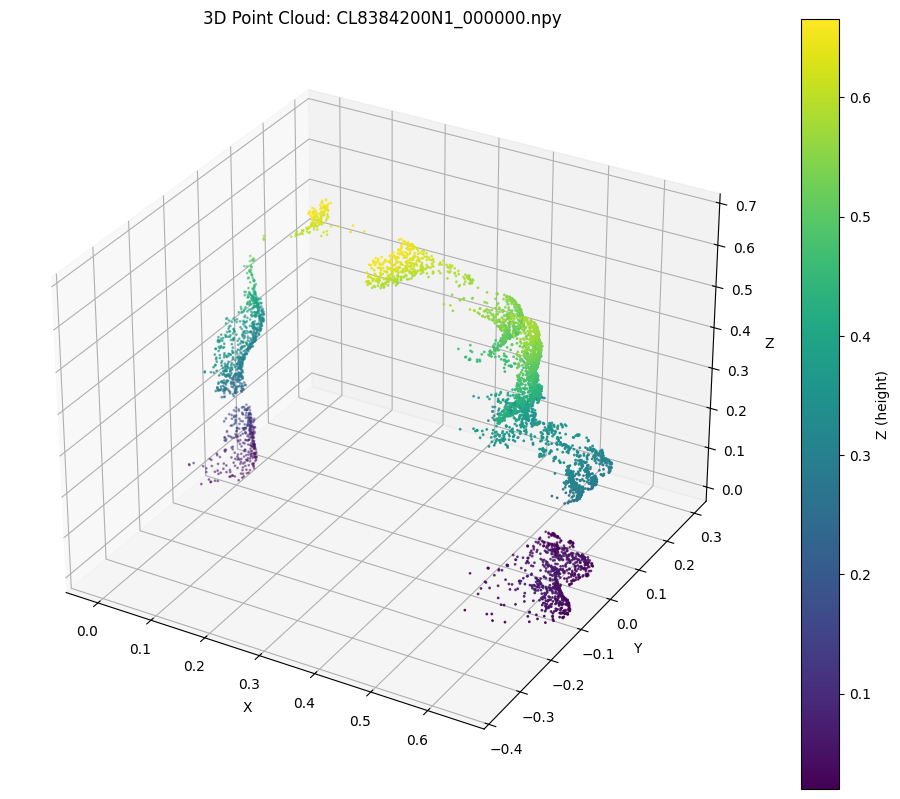

In [6]:
# 3D visualization
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use even more aggressive subsampling for 3D plot
subsample_idx_3d = np.random.choice(len(pcd_data), min(5000, len(pcd_data)), replace=False)
pcd_subsample_3d = pcd_data[subsample_idx_3d]

scatter = ax.scatter(pcd_subsample_3d[:, 0], 
                     pcd_subsample_3d[:, 1], 
                     pcd_subsample_3d[:, 2],
                     c=pcd_subsample_3d[:, 2],  # Color by height (Z)
                     cmap='viridis',
                     s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'3D Point Cloud: {sample_pcd_file.name}')
plt.colorbar(scatter, ax=ax, label='Z (height)')

# Set equal aspect ratio
max_range = np.array([pcd_subsample_3d[:, 0].max() - pcd_subsample_3d[:, 0].min(),
                      pcd_subsample_3d[:, 1].max() - pcd_subsample_3d[:, 1].min(),
                      pcd_subsample_3d[:, 2].max() - pcd_subsample_3d[:, 2].min()]).max() / 2.0
mid_x = (pcd_subsample_3d[:, 0].max() + pcd_subsample_3d[:, 0].min()) * 0.5
mid_y = (pcd_subsample_3d[:, 1].max() + pcd_subsample_3d[:, 1].min()) * 0.5
mid_z = (pcd_subsample_3d[:, 2].max() + pcd_subsample_3d[:, 2].min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()

## 6. Compare Multiple Timesteps

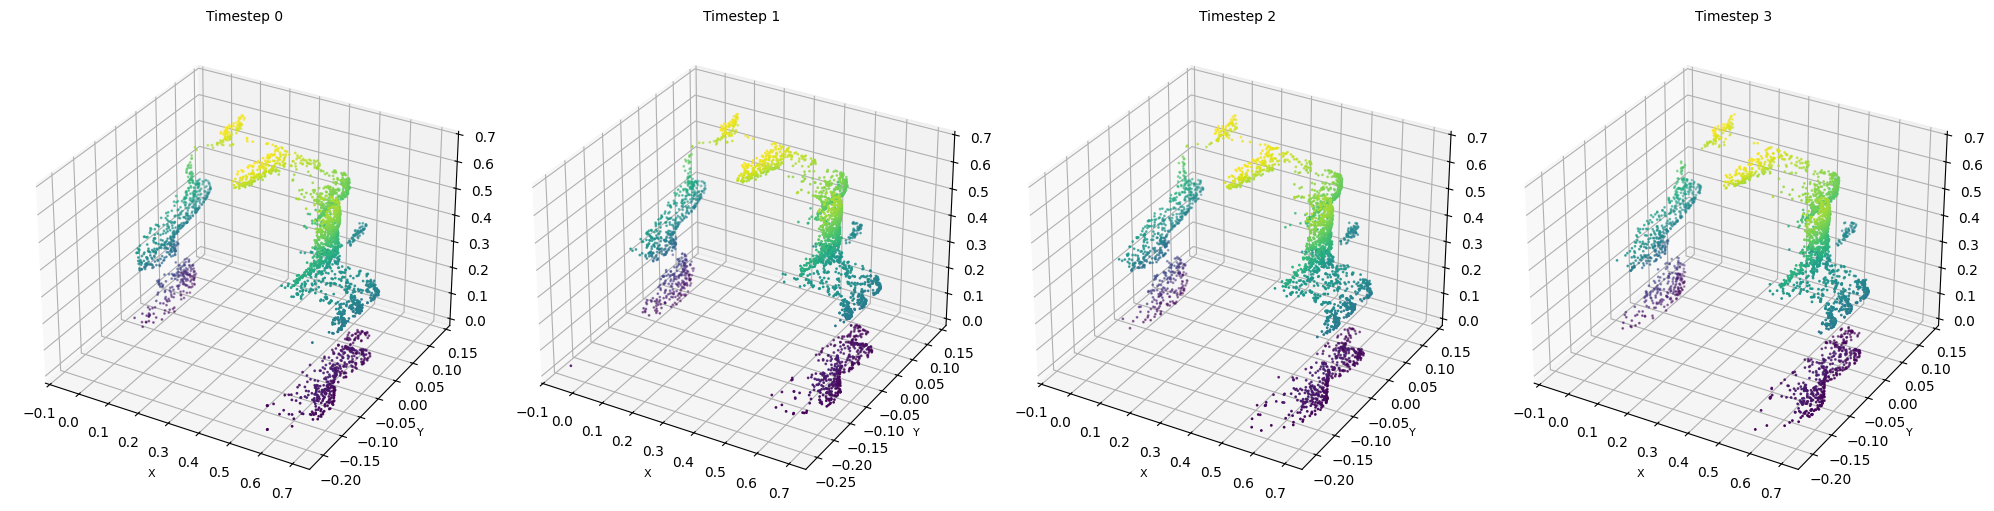

In [7]:
# Visualize point clouds from different timesteps
num_timesteps = min(4, len(pcd_files))
fig = plt.figure(figsize=(20, 5))

for i in range(num_timesteps):
    pcd = np.load(pcd_files[i])
    subsample_idx = np.random.choice(len(pcd), min(3000, len(pcd)), replace=False)
    pcd_sub = pcd[subsample_idx]
    
    ax = fig.add_subplot(1, num_timesteps, i+1, projection='3d')
    ax.scatter(pcd_sub[:, 0], pcd_sub[:, 1], pcd_sub[:, 2], 
               c=pcd_sub[:, 2], cmap='viridis', s=1)
    ax.set_title(f'Timestep {i}', fontsize=10)
    ax.set_xlabel('X', fontsize=8)
    ax.set_ylabel('Y', fontsize=8)
    ax.set_zlabel('Z', fontsize=8)

plt.tight_layout()
plt.show()

## 7. Analyze Robot State Over Time

Available observation keys: ['cartesian_position', 'gripper_position', 'joint_positions', 'joint_velocities', 'joint_torques_computed', 'prev_joint_torques_computed', 'prev_joint_torques_computed_safened', 'motor_torques_measured', 'prev_controller_latency_ms', 'prev_command_successful', 'robot_timestamp_seconds', 'robot_timestamp_nanos', 'robot_action', 'desired_pose', ' desired_pose', 'intrinsics', 'palm_pose']


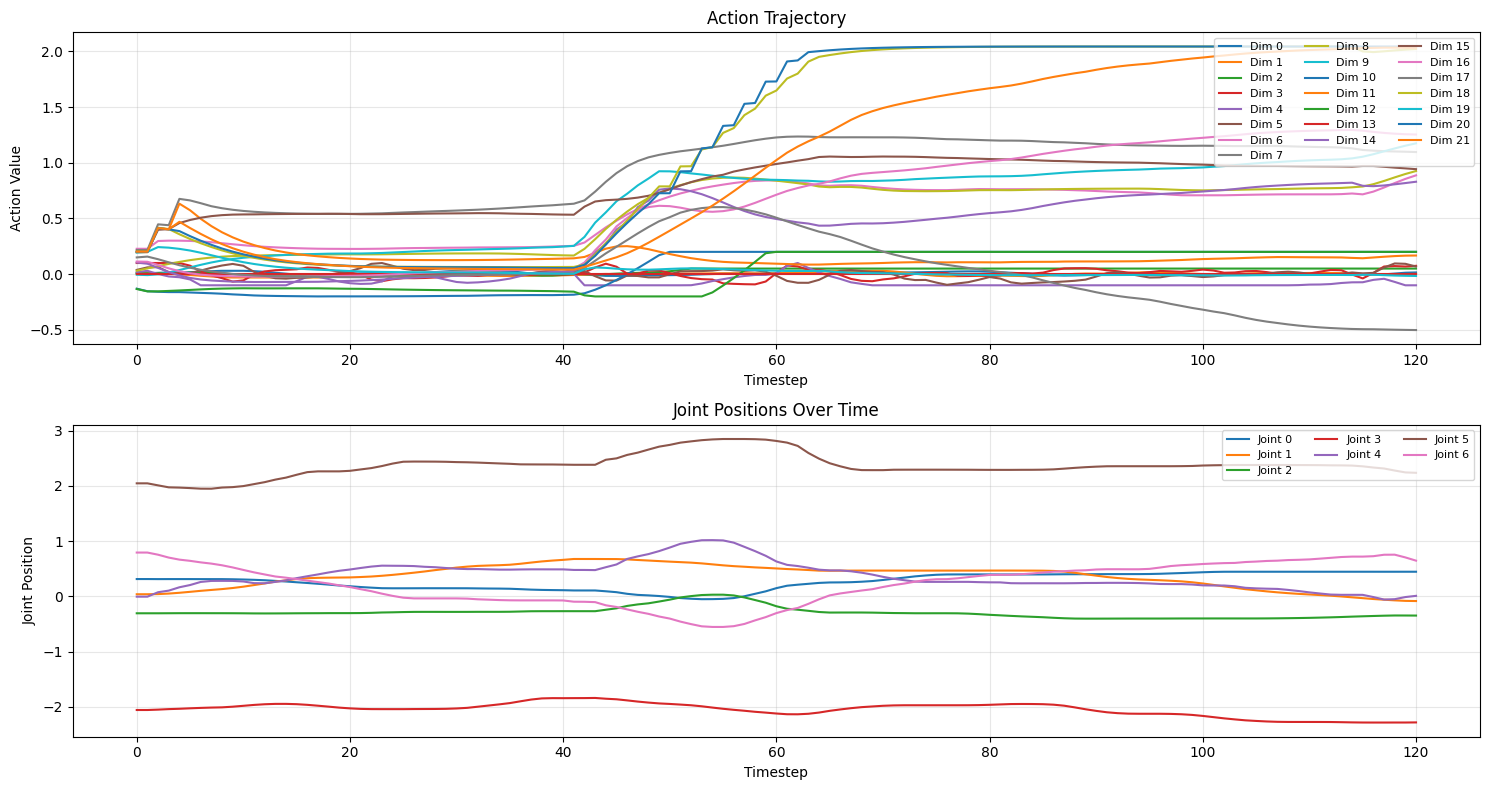

In [8]:
# Plot robot state trajectories
actions = np.array(episode_data['actions'])

# Extract observation data over time
obs_keys = list(episode_data['obs'][0].keys())
print(f"Available observation keys: {obs_keys}")

# Plot actions over time
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Actions
axes[0].plot(actions)
axes[0].set_title('Action Trajectory')
axes[0].set_xlabel('Timestep')
axes[0].set_ylabel('Action Value')
axes[0].legend([f'Dim {i}' for i in range(actions.shape[1])], loc='upper right', ncol=3, fontsize=8)
axes[0].grid(True, alpha=0.3)

# Observations (e.g., joint positions)
if 'joint_positions' in obs_keys:
    joint_positions = np.array([obs['joint_positions'] for obs in episode_data['obs']])
    axes[1].plot(joint_positions)
    axes[1].set_title('Joint Positions Over Time')
    axes[1].set_xlabel('Timestep')
    axes[1].set_ylabel('Joint Position')
    axes[1].legend([f'Joint {i}' for i in range(joint_positions.shape[1])], loc='upper right', ncol=3, fontsize=8)
    axes[1].grid(True, alpha=0.3)
elif obs_keys:
    # Plot first available obs key
    key = obs_keys[0]
    obs_values = np.array([obs[key] for obs in episode_data['obs']])
    axes[1].plot(obs_values)
    axes[1].set_title(f'{key} Over Time')
    axes[1].set_xlabel('Timestep')
    axes[1].set_ylabel(key)
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Data Statistics Across Episodes

Episode Length Statistics (first 20 episodes):
  Mean: 100.5 timesteps
  Std: 12.1
  Min: 82 timesteps
  Max: 125 timesteps

Point Cloud Size Statistics:
  Mean: 166785 points
  Std: 14743
  Min: 144098 points
  Max: 185650 points


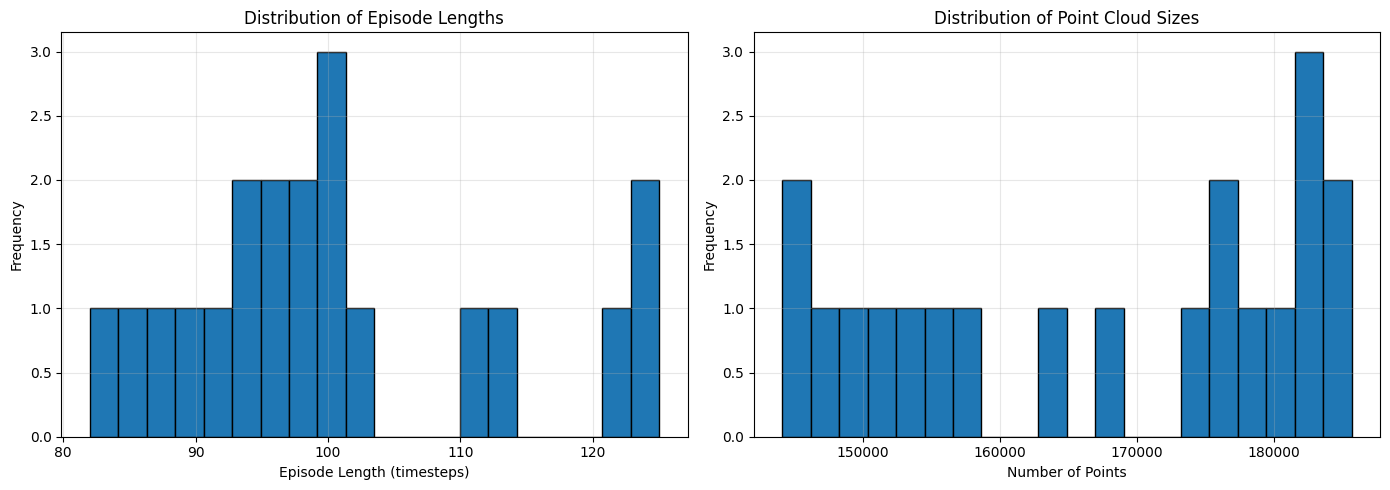

In [9]:
# Analyze data statistics across multiple episodes
episode_lengths = []
num_points_list = []

for ep in episodes[:20]:  # Check first 20 episodes
    episode_file = list(ep.glob('episode_*.npy'))
    if episode_file:
        ep_data = np.load(episode_file[0], allow_pickle=True).item()
        episode_lengths.append(len(ep_data['actions']))
    
    pcd_files = [f for f in ep.glob('*.npy') if 'episode' not in f.name]
    if pcd_files:
        pcd = np.load(pcd_files[0])
        num_points_list.append(len(pcd))

print(f"Episode Length Statistics (first 20 episodes):")
print(f"  Mean: {np.mean(episode_lengths):.1f} timesteps")
print(f"  Std: {np.std(episode_lengths):.1f}")
print(f"  Min: {np.min(episode_lengths)} timesteps")
print(f"  Max: {np.max(episode_lengths)} timesteps")

print(f"\nPoint Cloud Size Statistics:")
print(f"  Mean: {np.mean(num_points_list):.0f} points")
print(f"  Std: {np.std(num_points_list):.0f}")
print(f"  Min: {np.min(num_points_list)} points")
print(f"  Max: {np.max(num_points_list)} points")

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(episode_lengths, bins=20, edgecolor='black')
axes[0].set_xlabel('Episode Length (timesteps)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Episode Lengths')
axes[0].grid(True, alpha=0.3)

axes[1].hist(num_points_list, bins=20, edgecolor='black')
axes[1].set_xlabel('Number of Points')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Point Cloud Sizes')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()